     MSFT    AAPL     JMP    WBA     AMZN    XOM    HES     DIS    PFE  \
0  289.46  146.14  157.50  47.10  3344.94  57.86  73.14  177.13  45.07   
1  289.52  147.06  153.15  46.93  3375.99  57.20  73.20  176.71  45.06   
2  286.51  146.95  151.24  46.54  3354.72  56.84  71.87  172.58  45.19   
3  287.12  147.36  152.89  47.49  3366.24  58.20  74.98  172.99  45.68   
4  284.82  145.52  151.17  46.83  3331.48  57.58  73.78  175.55  43.96   

      UNH  ...       GS  GBPUSD  CNYJPY    TNX   FVX    TVX     HG1     GC1  \
0  415.12  ...  147.728  1.3872  16.985  12.90  7.65  19.34  4.3480  1760.3   
1  411.19  ...  147.693  1.3931  16.944  12.17  7.19  18.63  4.3480  1805.7   
2  421.54  ...  146.770  1.3889  16.857  11.84  6.75  18.40  4.3325  1811.2   
3  421.90  ...  149.384  1.3916  16.901  11.76  6.51  18.52  4.3860  1810.7   
4  415.57  ...  149.852  1.3883  16.987  11.74  6.51  18.53  4.4330  1818.7   

     CL1      W1  
0  68.28  7.1900  
1  69.09  7.1275  
2  68.15  7.1725  
3  7

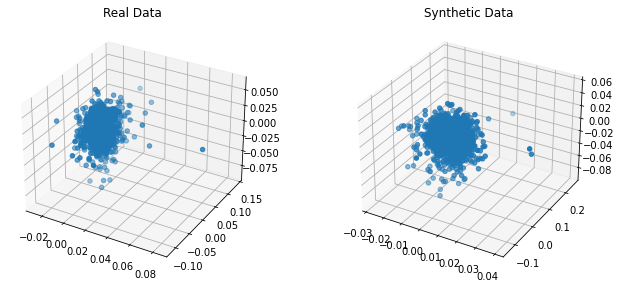

In [11]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from copulas.multivariate import GaussianMultivariate
from copulas.visualization import compare_3d

# Load a dataset with 3 columns that are not independent
master_data = pd.read_csv("test5years.csv", header=0)
print(master_data.head())
real_data = master_data[['GBPUSD', 'AAPL', 'W1']] 
real_data = np.log(real_data) - np.log(real_data.shift(1))
real_data = real_data[1:]
print(real_data.head())

# Fit a gaussian copula to the data
copula = GaussianMultivariate()
copula.fit(real_data)

# Sample synthetic data
synthetic_data = copula.sample(len(real_data))

# Plot the real and the synthetic data to compare
compare_3d(real_data, synthetic_data)

In [12]:
print(synthetic_data)

        GBPUSD      AAPL        W1
0    -0.003119 -0.014932  0.010000
1     0.001130  0.011402 -0.000751
2     0.002591  0.017104 -0.074397
3    -0.000024 -0.006646 -0.012937
4     0.001369 -0.007914  0.024909
...        ...       ...       ...
1402 -0.001312 -0.005012  0.000637
1403 -0.002553 -0.022365 -0.012237
1404 -0.001839 -0.019508 -0.005647
1405 -0.011969 -0.006130  0.006602
1406  0.000051 -0.006501 -0.003519

[1407 rows x 3 columns]


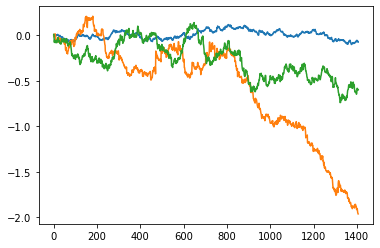

In [13]:
import matplotlib.pyplot as plt 
plt.plot(synthetic_data.cumsum())

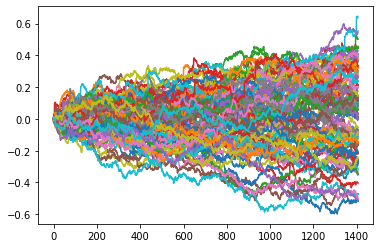

In [17]:
# Number of generated paths
paths = 100
ticker = "GBPUSD"
synth_data = []
for i in range(paths):
    temp = copula.sample(len(real_data))
    synth_data.append(temp)
    plt.plot(temp[ticker].cumsum())

In [19]:
print(synth_data)

[        GBPUSD      AAPL        W1
0    -0.006179 -0.008417  0.005330
1    -0.001421 -0.011514 -0.002560
2    -0.001091 -0.008815 -0.033568
3     0.001733  0.008173  0.003542
4     0.001795  0.013015  0.000392
...        ...       ...       ...
1402  0.004094  0.011788  0.017360
1403 -0.001202 -0.000753  0.006830
1404  0.000035 -0.004562  0.010729
1405 -0.001291  0.000413  0.001740
1406  0.007690 -0.008885  0.005723

[1407 rows x 3 columns],         GBPUSD      AAPL        W1
0    -0.000584 -0.028667 -0.005436
1    -0.012266  0.005670 -0.004917
2     0.004215 -0.007885 -0.018084
3     0.006088 -0.011642 -0.003074
4    -0.003575  0.001370 -0.001180
...        ...       ...       ...
1402 -0.000584 -0.024542 -0.016915
1403 -0.002237  0.013626 -0.017066
1404  0.003499 -0.027767  0.013331
1405  0.004169  0.000582  0.016960
1406 -0.003581  0.000035 -0.014761

[1407 rows x 3 columns],         GBPUSD      AAPL        W1
0     0.003233 -0.002790 -0.022660
1     0.003065 -0.016820  0.010224
2 